In [1]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
%matplotlib inline

In [2]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
iris = load_iris()

In [4]:
iris.data.shape

(150, 4)

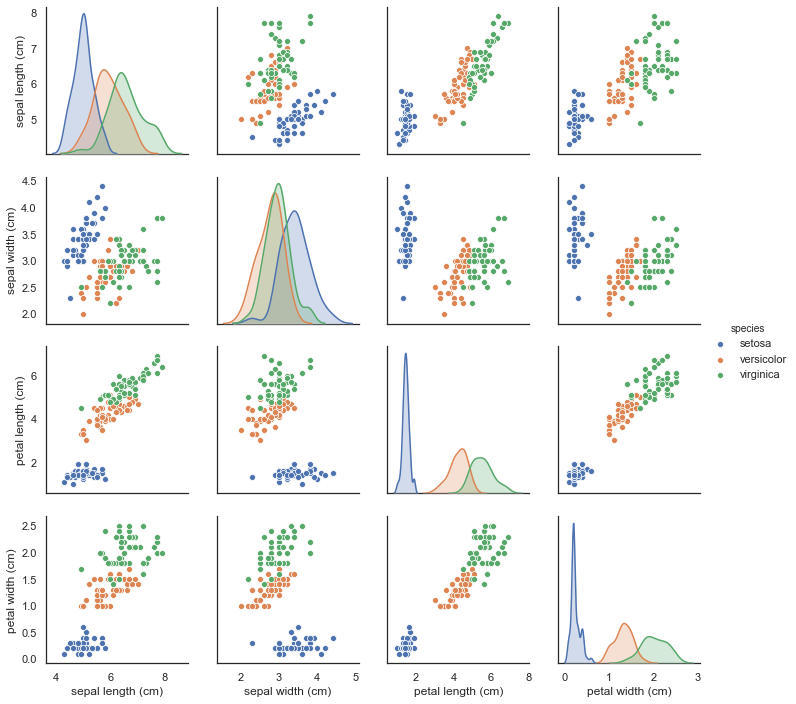

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Series(iris.target).map(dict(zip(range(3),iris.target_names)))
sns.pairplot(iris_df, hue='species');

In [6]:
reducer = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=100)

In [7]:
embedding = reducer.fit_transform(iris.data)
embedding.shape

C:\Users\Yasha\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


(150, 100)

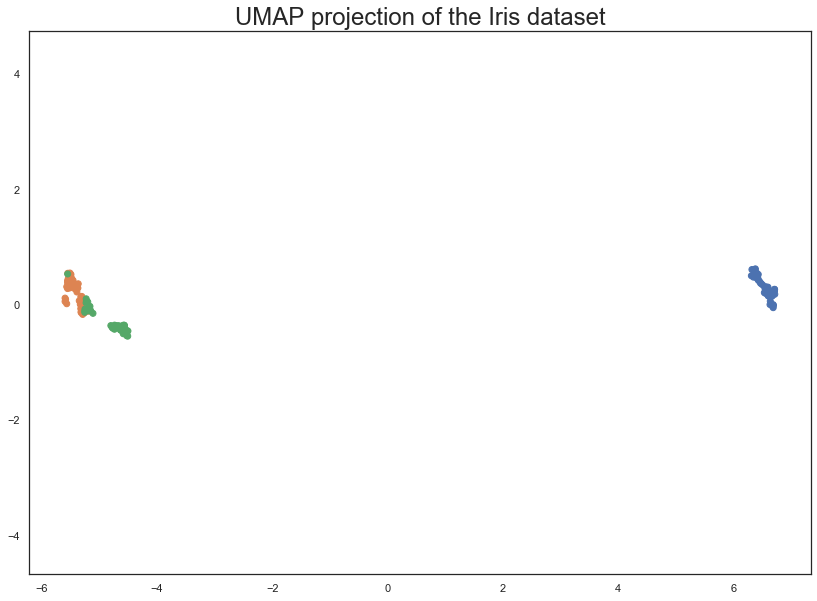

In [8]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Iris dataset', fontsize=24);

In [9]:
kpca = KernelPCA(n_components=20, kernel='rbf', gamma=15)
pca = PCA(n_components=2)

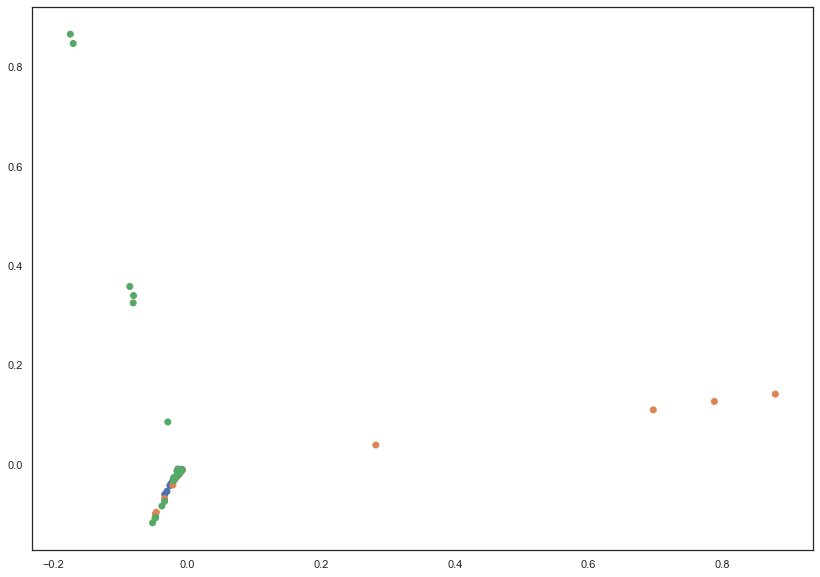

In [12]:
#kpca = kpca.fit(embedding)
kpca_result = kpca.fit_transform(embedding)
plt.scatter(kpca_result[:, 0], kpca_result[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.show()

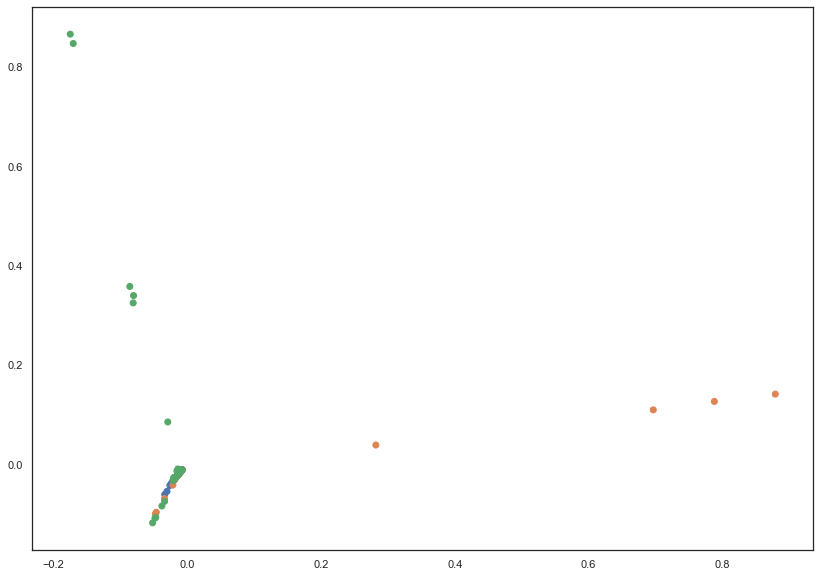

In [13]:
pca = pca.fit(kpca_result)
pca_result = pca.transform(kpca_result)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=[sns.color_palette()[x] for x in iris.target])
plt.show()